In [1]:
 !pip install selenium
 !pip install beautifulsoup4
 !pip install requests
 !pip install lxml

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Для того, что бы все работало, нужно скачать chromedriver

Ссылка откуда можно скачать chromedriver https://chromedriver.chromium.org/downloads.

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait as wait
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

Проверочный скрипт, который выдает количество фильмов на первой странице. Если все установлено верно, ты выдаст в ответе 50

In [3]:
browser = Chrome('chromedriver')
url = f'https://ru.kinorium.com/collections/critics/131/?order=sequence&page=1&perpage=50&show_viewed=1'
browser.get(url)
browser.page_source
soup = BeautifulSoup(browser.page_source, 'lxml')
films = soup.findAll('div', class_='filmList__item-content')
print(len(films))

50


In [4]:
def film_control(url):
    browser.get(url)
    soup = BeautifulSoup(browser.page_source, 'lxml')
    budget = soup.find('div', class_='film-page__infowrap').find('span', class_='box-budget-tooltip')
    fees = soup.find('div', class_='film-page__infowrap').find('span', class_='film-page__gross-switcher-control')
    return(budget, fees)

In [5]:
df = pd.DataFrame({'Русское название':[], 'Оригинальное название':[], 'Год':[], 'Рейтинг IMDb':[], 'Страна':[], 'Режиссер':[], 'Бюджет ($)':[], 'Cборы в Мире ($)':[], 'Ссылка':[]})
browser = Chrome('chromedriver')
# df = pd.DataFrame({'Русское название':[], 'Оригинальное название':[], 'Год':[], 'Рейтинг IMDb':[], 'Страна':[], 'Режиссер':[], 'Ссылка':[]})

for i in range(1,21):
    print(f'Страница {i}')
    url = f'https://ru.kinorium.com/collections/critics/131/?order=sequence&page={i}&perpage=50&show_viewed=1'
    browser.get(url)
    sleep(3)  
    soup = BeautifulSoup(browser.page_source, 'lxml')
    films = soup.findAll('div', class_='filmList__item-content')
    for film in films:
        link = 'https://ru.kinorium.com'+ film.find('a', class_='filmList__item-title item__title filmList__item-title-link').get('href')
        rus_name = film.find('a', class_='filmList__item-title item__title filmList__item-title-link').find('i', class_='movie-title__text filmList__item-title-link-popup link-info-movie-type-film').text.strip()
        *eng_name, year = film.find('div', class_='info-box filmList__item-title-wrap').find('div', class_='info').find('div', class_='select-wrap').text.strip().split(', ')
        IMDb_rating = film.find('div', class_='info-box filmList__item-title-wrap').find('div', class_='info').find('div', class_='item__link-rating').find('li', class_='rating_imdb').text.strip().split(' :  ')[1]
        country, director = film.find('div', class_='info-box filmList__item-title-wrap').find('div', class_='info').find('p', class_='filmList__extra-info').find('span', class_='filmList__extra-info-director').text.strip().split(' •  ')
        budget, fees = film_control(link)
        if budget != None:
            budget = budget.text.strip()
            if "CA$" in budget:
                budget = budget.replace('CA$', '')
                budget = int(''.join(budget.split()))
            elif "A$" in budget:
                budget = budget.replace('A$', '')
                budget = int(''.join(budget.split()))
            elif "$" in budget:
                budget = budget.replace('$', '')
                budget = int(''.join(budget.split()))
            else:
                budget = None

        if fees != None:
            fees = fees.text.strip().replace('$', '').replace('Р', '')
            fees = int(''.join(fees.split()))
        if "Топ-500" in rus_name:
            rus_name = rus_name.replace('Топ-500', '')
        if '...' in director:
            director = director.replace('...', '')
        if eng_name == []:
            eng_name = [rus_name]

        df.loc[len(df.index)] = [rus_name, ''.join(eng_name), year, IMDb_rating, country, director, budget, fees, link]

print('Готово!')

Страница 1
Страница 2
Страница 3
Страница 4
Страница 5
Страница 6
Страница 7
Страница 8
Страница 9
Страница 10
Страница 11
Страница 12
Страница 13
Страница 14
Страница 15
Страница 16
Страница 17
Страница 18
Страница 19
Страница 20
Готово!


In [6]:
df['Рейтинг IMDb'] = df['Рейтинг IMDb'].astype('float')

In [7]:
df = df.fillna(df.mean()).round(0)

C:\Users\Дарья\AppData\Local\Temp\ipykernel_7848\706233491.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean()).round(0)


Заполняем пропуски в данных средними значениями. В основном пропуски в колонках бюджет и сборы по миру, на этом сайте нет информации о бюджете части фильмов, и среднее знаечние для бюджета будет оптимальным, так как не смещает выборку. Возможно для каких-то фильмов в действительности средние значения бюджета далеки от реальности, но такая жизнь, nobody gonna know.

Сохранение базы данных фильмов в формат csv

In [8]:
df.to_csv('films_result.csv', index=False, sep=';', encoding='utf-8-sig')

Когда парсинг уже произошел, следует использовать следующую команду

In [9]:
 df=pd.read_csv('films_result.csv', sep=';') 

In [10]:
df.head(20)

,Русское название,Оригинальное название,Год,Рейтинг IMDb,Страна,Режисер,Бюджет ($),Cборы в Мире ($),Ссылка
0,Туз в рукаве,Ace in the Hole,1951,8.0,США,Билли Уайлдер,1800000.0,2300000.0,https://ru.kinorium.com/41033/
1,Эйс Вентура: Розыск домашних животных,Ace Ventura: Pet Detective,1993,7.0,США,Том Шэдьяк,15000000.0,107217396.0,https://ru.kinorium.com/99229/
2,Месть актера,Yukinojô henge,1963,7.0,Япония,Кон Итикава,11398150.0,50042441.0,https://ru.kinorium.com/54246/
3,Зависимость,The Addiction,1994,6.0,США,Абель Феррара,11398150.0,307308.0,https://ru.kinorium.com/102068/
4,Страховой агент,The Adjuster,1991,7.0,Канада,Атом Эгоян,1500000.0,396573.0,https://ru.kinorium.com/92500/
5,Приключения Бакару Банзая в восьмом измерении,The Adventures of Buckaroo Banzai Across the 8...,1984,6.0,США,У. Д. Рихтер,11398150.0,6254148.0,https://ru.kinorium.com/79880/
6,Приключения Робин Гуда,The Adventures of Robin Hood,1938,8.0,США,Майкл Кёртиц,1900000.0,3981000.0,https://ru.kinorium.com/28192/
7,После работы,After Hours,1985,8.0,США,Мартин Скорсезе,4500000.0,10609321.0,https://ru.kinorium.com/81475/
8,"Агирре, гнев божий",Aguirreder Zorn Gottes,1972,8.0,"Германия (ФРГ), Мексика",Вернер Херцог,370000.0,37041.0,https://ru.kinorium.com/63490/
9,Аэроплан,Airplane!,1980,8.0,США,Джим Абрахамс,3500000.0,83453539.0,https://ru.kinorium.com/74115/


In [11]:
print('Количество уникальных значений для каждого столбца (df.nunique()):\n', df.nunique()) 

Количество уникальных значений для каждого столбца (df.nunique()):
 Русское название         1000
Оригинальное название    1000
Год                        91
Рейтинг IMDb                4
Страна                    173
Режисер                   603
Бюджет ($)                223
Cборы в Мире ($)          817
Ссылка                   1000
dtype: int64


Итак, наша таблица содержит 8 столбцов с полезными для нашего анализа элементами. Столбцы с текстовыми данными - Русское название, Оригинальное название, Страна и Режиссер. Столбцы с числовыми данными - Год, Рейтинг IMDb, Бюджет и Cборы в Мире. Все пропуски мы уже заполнили средними значениями.

Давайте посмотрим топ 20 фильмов по рейтингу, по бюджету и по сборам по миру

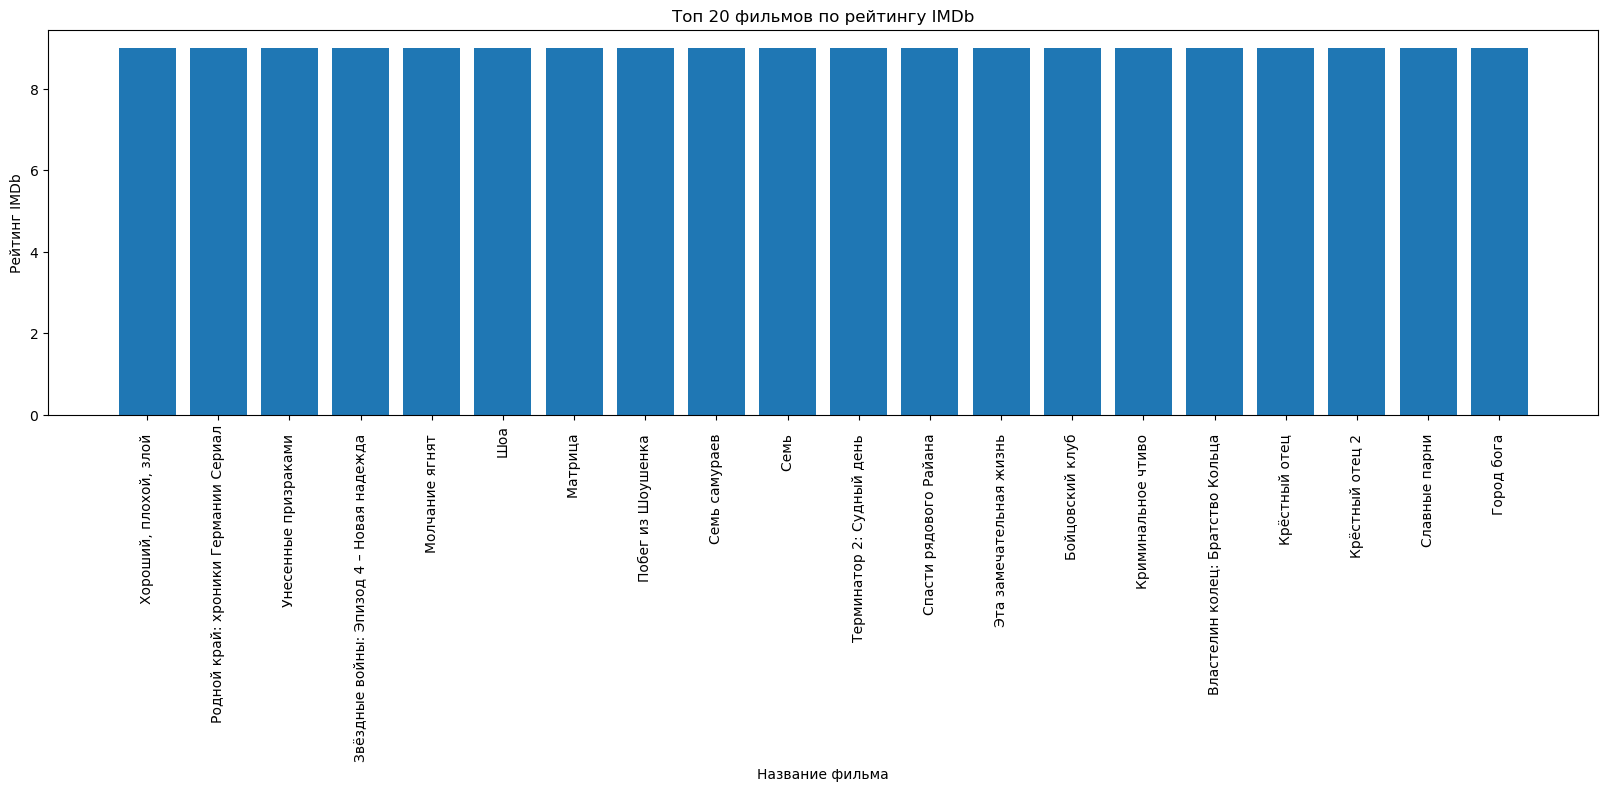

In [12]:
sorted_df_rating = df.sort_values(by='Рейтинг IMDb', ascending=False)
top_20_rating = sorted_df_rating.head(20)

plt.figure(figsize=(20, 5)) 
plt.bar(top_20_rating['Русское название'], top_20_rating['Рейтинг IMDb'])
plt.xticks(rotation=90)
plt.xlabel('Название фильма') 
plt.ylabel('Рейтинг IMDb') 
plt.title('Топ 20 фильмов по рейтингу IMDb') 
plt.show() 

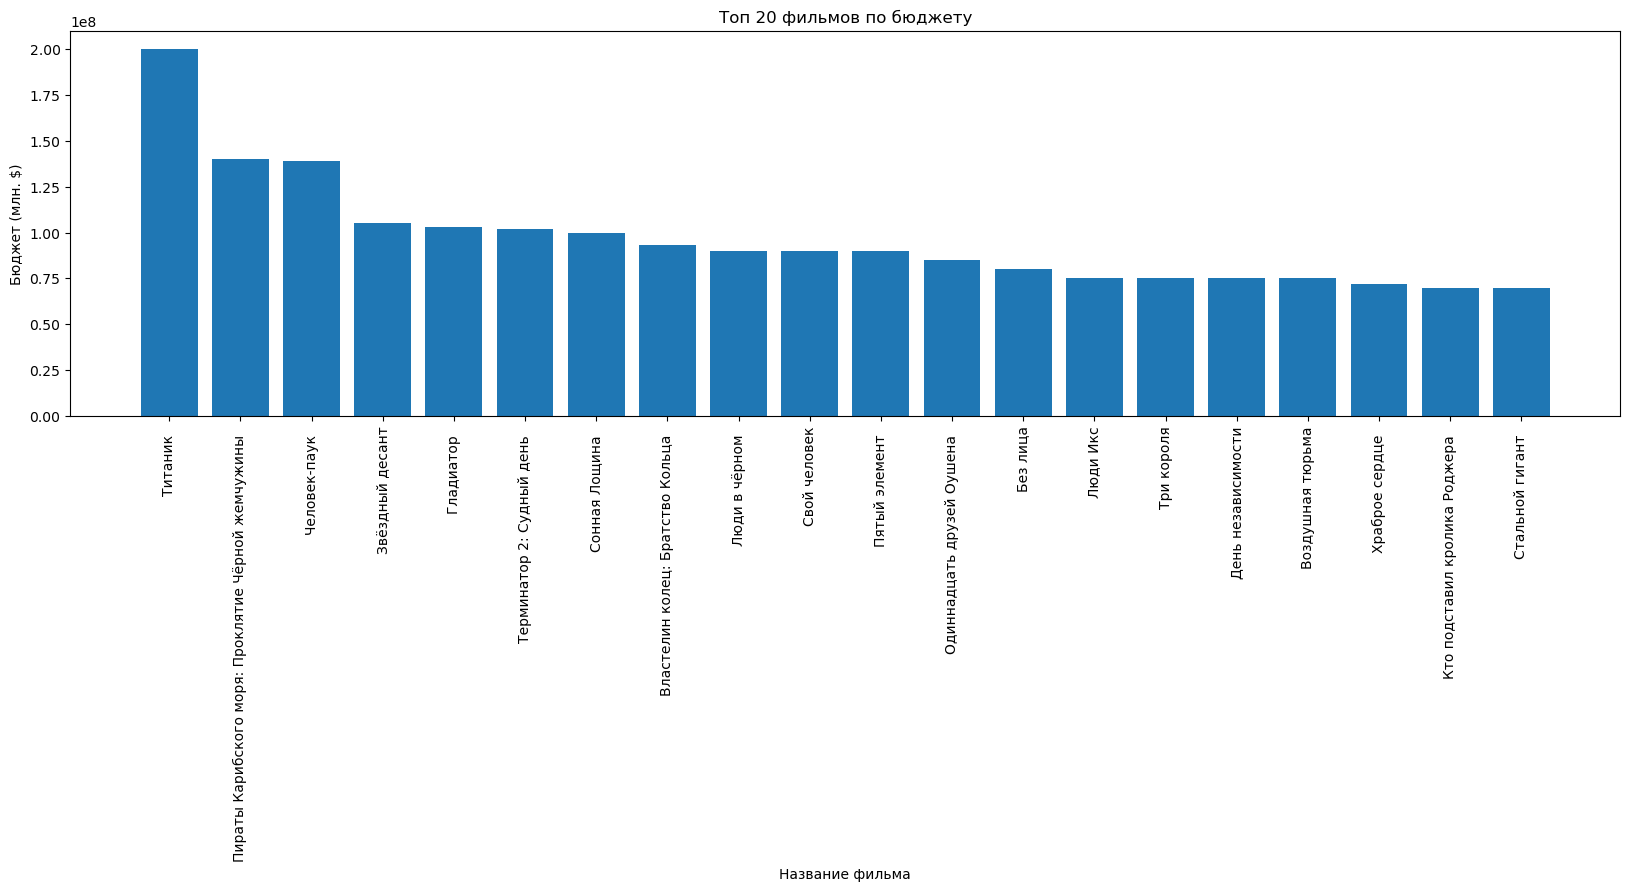

In [13]:
sorted_df_budget = df.sort_values(by='Бюджет ($)', ascending=False)
top_20_budget = sorted_df_budget.head(20)

plt.figure(figsize=(20, 5)) 
plt.bar(top_20_budget['Русское название'], top_20_budget['Бюджет ($)'])
plt.xticks(rotation=90)
plt.xlabel('Название фильма') 
plt.ylabel('Бюджет (млн. $)') 
plt.title('Топ 20 фильмов по бюджету') 
plt.show() 

Можем ради интереса посмотреть, какой был бюджет у фильмов с саыми высоким рейтингом

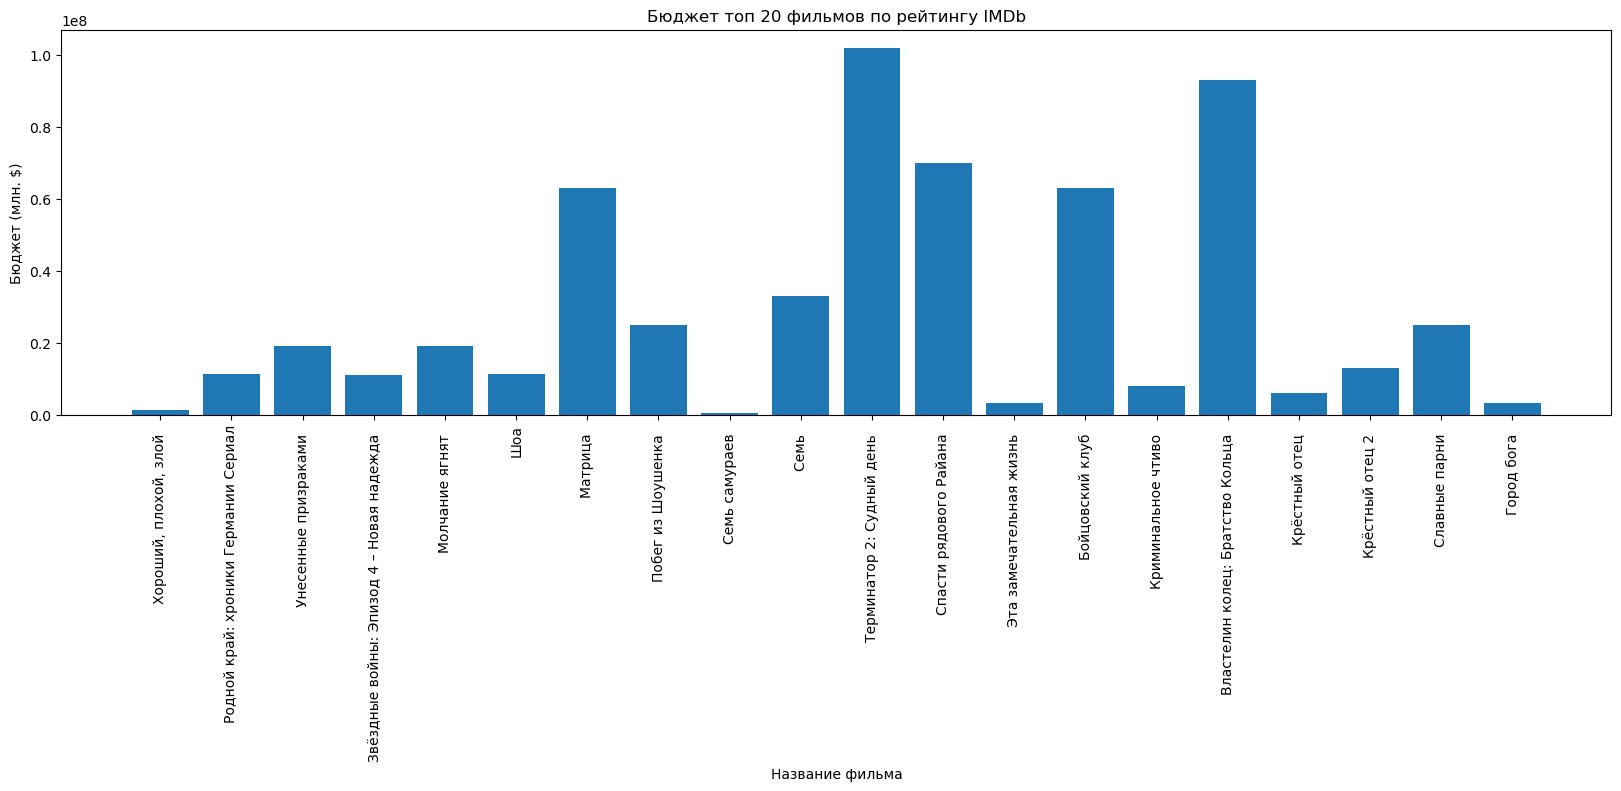

In [14]:
sorted_df_rating = df.sort_values(by='Рейтинг IMDb', ascending=False)
top_20_rating = sorted_df_rating.head(20)

plt.figure(figsize=(20, 5)) 
plt.bar(top_20_rating['Русское название'], top_20_rating['Бюджет ($)'])
plt.xticks(rotation=90)
plt.xlabel('Название фильма') 
plt.ylabel('Бюджет (млн. $)') 
plt.title('Бюджет топ 20 фильмов по рейтингу IMDb') 
plt.show() 

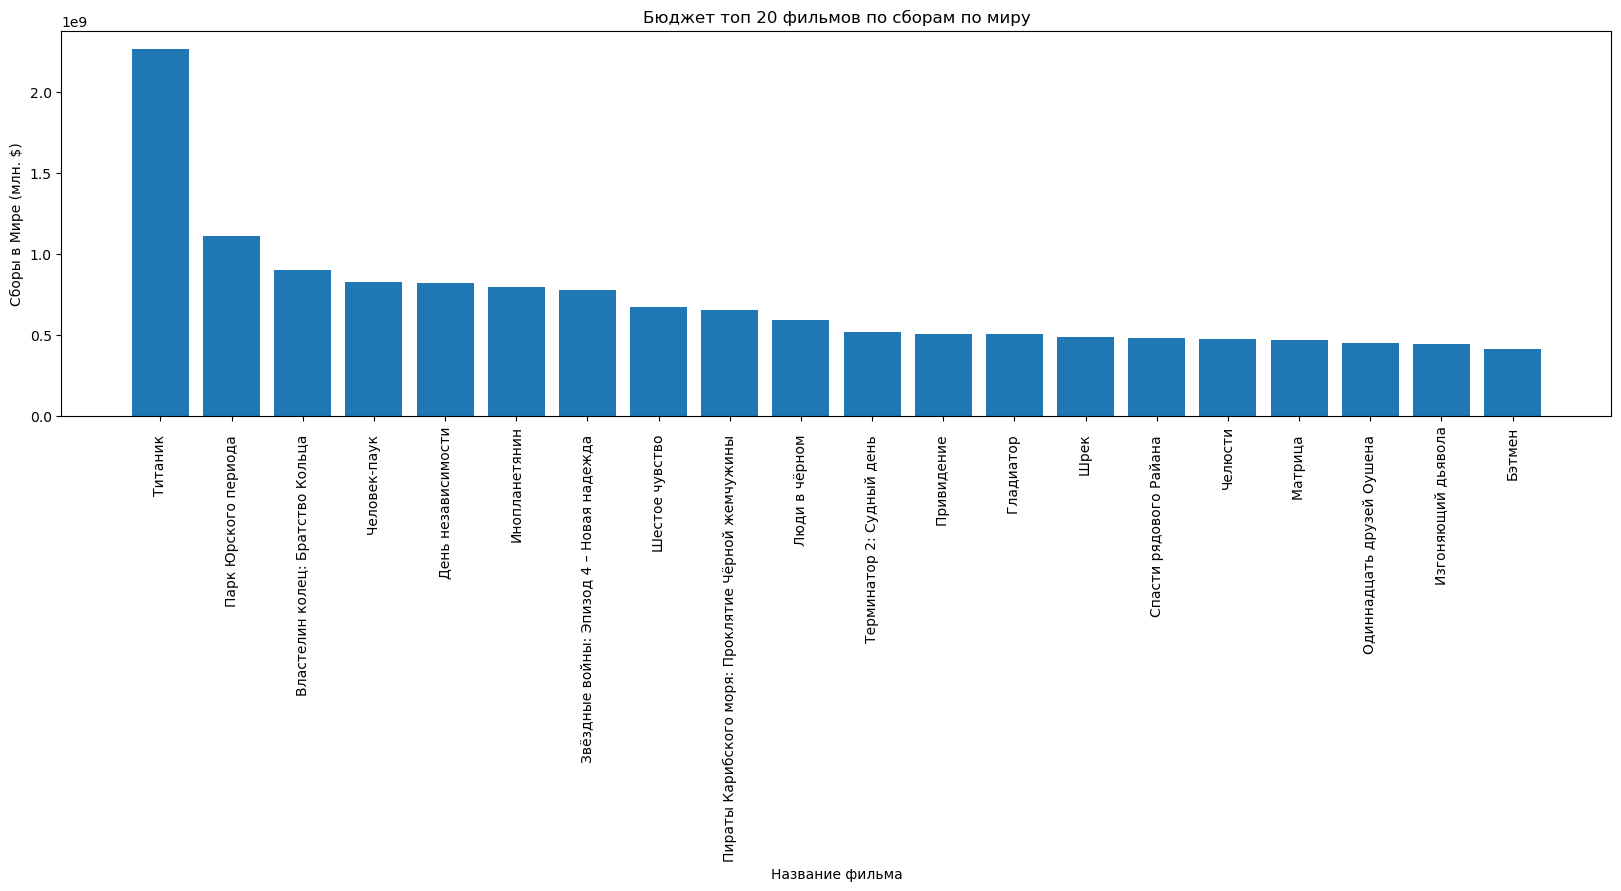

In [15]:
sorted_df_sbor = df.sort_values(by='Cборы в Мире ($)', ascending=False)
top_20_sbor = sorted_df_sbor.head(20)

plt.figure(figsize=(20, 5)) 
plt.bar(top_20_sbor['Русское название'], top_20_sbor['Cборы в Мире ($)'])
plt.xticks(rotation=90)
plt.xlabel('Название фильма') 
plt.ylabel('Cборы в Мире (млн. $)') 
plt.title('Бюджет топ 20 фильмов по сборам по миру') 
plt.show() 

,Бюджет ($),Cборы в Мире ($)
Бюджет ($),1.000000,0.685611
Cборы в Мире ($),0.685611,1.000000


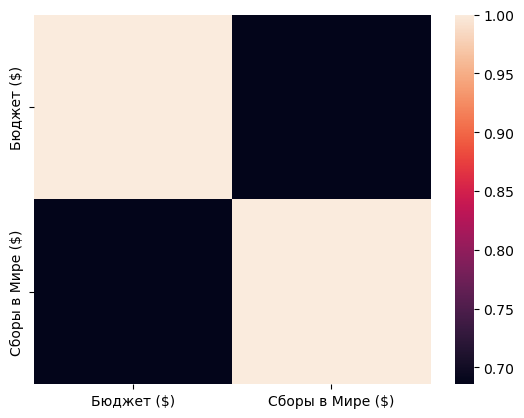

In [16]:
sns.heatmap(df[['Бюджет ($)', 'Cборы в Мире ($)']].corr())
df[['Бюджет ($)', 'Cборы в Мире ($)']].corr()

Как мы видим по этому супер микро хитмапу, если брать все фильмы, то корреляция между бюджетами и сборами по миру больше 0,5, аж 0,69, между ними есть положительная линейная связь. Давайте посмотрим на график их зависимости друг от друга.

Text(0, 0.5, 'Сборы по миру (млн $)')

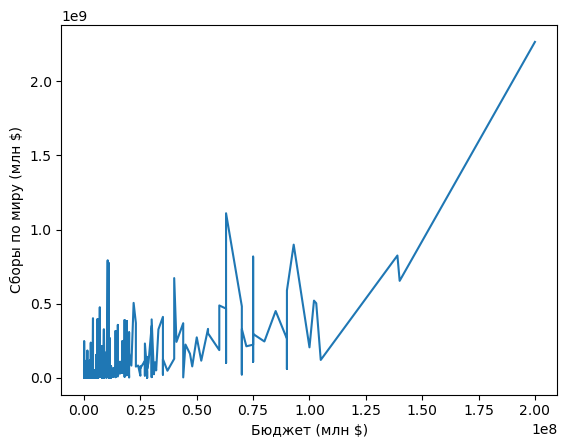

In [17]:
plt.plot(sorted_df_budget['Бюджет ($)'], sorted_df_budget['Cборы в Мире ($)'])
plt.xlabel('Бюджет (млн $)')
plt.ylabel('Сборы по миру (млн $)')

Давайте еще посмотрим, в какой год выходило наибольшее количество фильмов из нашего топ-листа

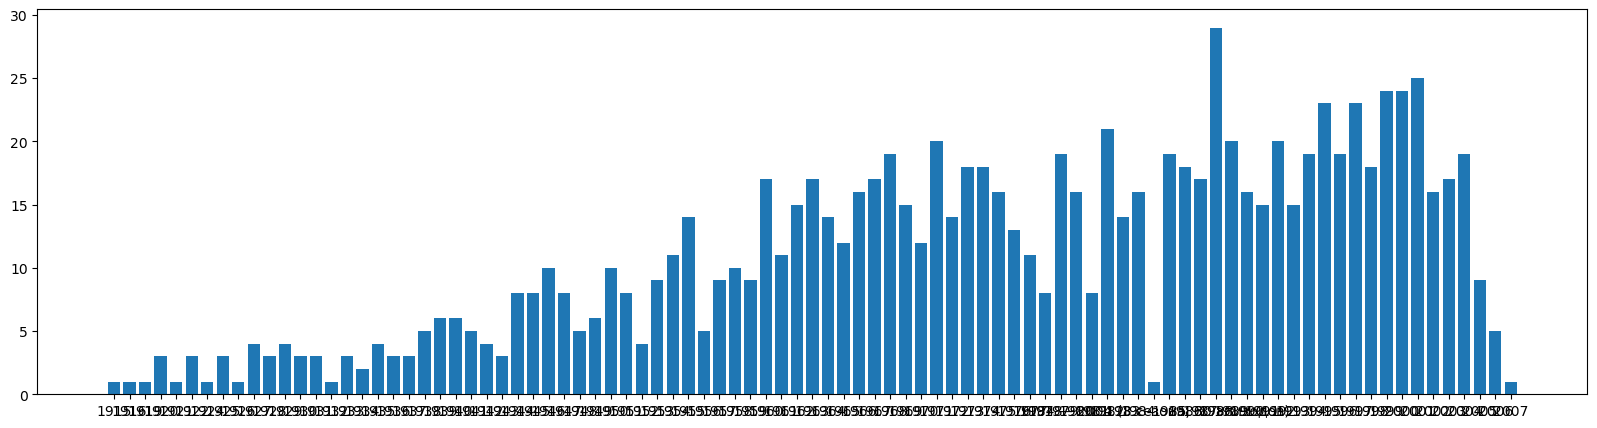

In [18]:
sorted_df_year = df.sort_values(by='Год', ascending=True)
popular = sorted_df_year['Год'].value_counts()
popular = popular.sort_index(ascending=True)
plt.figure(figsize=(20,5))
plt.bar(popular.keys(), popular.values)
plt.show()

In [19]:
sorted_df_year['Год'].value_counts().head(20)

1988    29
2001    25
2000    24
1999    24
1997    23
1995    23
1982    21
1989    20
1992    20
1971    20
1985    19
1979    19
1968    19
2004    19
1994    19
1996    19
1998    18
1986    18
1973    18
1974    18
Name: Год, dtype: int64

Получается фильмы 1988 года были самыми популярными в топе с этого сайта, все советуют нам смотреть фильмы 80-90-ых годов :)

Давайте создадим будущую переменную для машинного обучения, а именно прибыль для каждого фильма, равную разности между сборами по миру и бюджетом.

In [20]:
df['Прибыль ($)'] = df['Cборы в Мире ($)'] - df['Бюджет ($)']

In [21]:
df

,Русское название,Оригинальное название,Год,Рейтинг IMDb,Страна,Режисер,Бюджет ($),Cборы в Мире ($),Ссылка,Прибыль ($)
0,Туз в рукаве,Ace in the Hole,1951,8.0,США,Билли Уайлдер,1800000.0,2300000.0,https://ru.kinorium.com/41033/,500000.0
1,Эйс Вентура: Розыск домашних животных,Ace Ventura: Pet Detective,1993,7.0,США,Том Шэдьяк,15000000.0,107217396.0,https://ru.kinorium.com/99229/,92217396.0
2,Месть актера,Yukinojô henge,1963,7.0,Япония,Кон Итикава,11398150.0,50042441.0,https://ru.kinorium.com/54246/,38644291.0
3,Зависимость,The Addiction,1994,6.0,США,Абель Феррара,11398150.0,307308.0,https://ru.kinorium.com/102068/,-11090842.0
4,Страховой агент,The Adjuster,1991,7.0,Канада,Атом Эгоян,1500000.0,396573.0,https://ru.kinorium.com/92500/,-1103427.0
...,...,...,...,...,...,...,...,...,...,...
995,Затоiчи,Zatôichi,2003,8.0,Япония,Такеши Китано,11398150.0,34196922.0,https://ru.kinorium.com/284378/,22798772.0
996,Зази в метро,Zazie dans le métro,1960,7.0,Франция,Луи Маль,11398150.0,50042441.0,https://ru.kinorium.com/51271/,38644291.0
997,Ноль за поведение,Zéro de conduite: Jeunes diables au collège,1933,7.0,Франция,Жан Виго,11398150.0,50042441.0,https://ru.kinorium.com/23351/,38644291.0
998,Образцовый самец,Zoolander,2001,6.0,"США, Германия, Австралия",Бен Стиллер,28000000.0,60780981.0,https://ru.kinorium.com/161388/,32780981.0


Насчет гипотез мы пока придумали 2 штуки. Первая - чем позже вышел фильм, тем больше его прибыль вследствие развития технологий и популяризации кино как способа проведения досуга. Вторая - у фильмов с наибольшим рейтингом выше прибыль, ну и она в целом положительна. Смотреть дальше связь между бюджетом и сборами в мире с прибылью бессмысленно, мы получили последнюю как разность первых 2 и между ними очевидно есть прямая линейная связь.